Pre-Lab Submission 6
====================

* * *

**Due: Tue, 04 Mar 2025 07:30:00 (approximately 2 days from the time this page was loaded)**

**Score: [60 points total] [60 penalties total] [0 penalties graded so far]**

* * *

This lab is about implementing combinational building blocks. You will start by using the simulator to implement modules in SystemVerilog. Create a new workspace tab in the simulator called "lab6". Inside it, you will find a template.sv tab that contains a bare **top** module. Each new tab in the "lab6" workspace will create files named "newfile1.sv", "newfile2.sv", etc. You may use these names if you want to, but it would be better to rename them to something meaningful by pressing <shift>-mouse on the name. For instance, you might rename "template.sv" to "step1.sv".

It is possible to put modules in two or more files of a workspace. When the simulator is in the "Workspace Simulation" mode, it combines the modules of all files together. In this experiment, however, we will treat each file separately, so be sure to switch from "Workspace Simulation" to "File Simulation". If you don't, you will see the warning message "ERROR Re-definition of module '\top'!"

**Keep in mind that any syntax errors in your code on every assignment will result in a zero score. Ensure that your code runs on the simulator/FPGA where applicable, and that no errors appear on submission.**

Follow the instructions for each exercise below.

* * *

Academic Honesty Statement [0 ... -60 points]
-----------------------------------------------

By typing my name, below, I hereby certify that the work on this prelab is my own and that I have not copied the work of any other student (past or present) while completing it. I understand that if I fail to honor this agreement, I will receive a score of ZERO for the lab, a one letter drop in my final course grade, and be subject to possible disciplinary action.

Make sure to check that your name matches the one in [lab homework 0.]


In [6]:
name = ""
username = ""


1) Implementing a 4-to-1 multiplexer in Verilog [10 points]
-------------------------------------------------------------

Create a new file in the "lab6" workspace and rename it "step1.sv". In the top module, create an instance of a 4-to-1 multiplexer like so:

    **mux4to1 u1(.sel(pb[1:0]), .d(pb[7:4]), .y(green));**

That is all you need to add to the top module. The goal of this exercise is to create a system that allows you to specify four values on buttons 7–4 and then select one of them with buttons 1 and 0.

Immediately below the top module, create a module named **mux4to1** with ports

*   **output logic y**,
*   **input logic [3:0]d**,
*   **input logic [1:0]sel**,

In it, implement a 4-to-1 multiplexer. Here is an example of a 2-to-1 multiplexer in Verilog:

    module mux2to1 (
        output logic y,
        input logic [1:0] d,
        input logic sel
    );

      assign y = ~sel & d[0] |
                  sel & d[1];

    endmodule

You will have four 'd' inputs instead of two, and two 'sel' inputs instead of one, but the principle is the same.

Test your module well. Use <shift>-click on push buttons 7–4 to set the d[3:0] inputs to a persistent value. Then use buttons 1 and 0 to "select" one of those inputs. If buttons 7–4 are set to 1110, then pressing the 1 and 0 buttons as follows will show the result on the green LED:

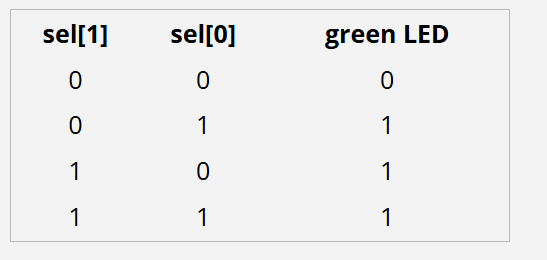

And you can see that sel[1:0] are the inputs and green is the output for an OR function. Changing d[3:0] to 0110 would implement an XOR function. Any two-variable Boolean expression can be implemented with a 4-to-1 mux. This is why multiplexers are used in an FPGA. The FPGA we use for this course is filled with 16-to-1 multiplexers that can naturally implement any 4-variable Boolean expression. These "logic cells" can be interconnected to form extremely complex designs.

When you have tested your design well, submit the file (including modules **top** and **mux4to1**) below.

Use the Test button before you click Save to ensure you did not make mistakes while submitting your code.
**This will neither confirm the functional correctness of your code, nor will it guarantee a non-zero score on this assignment.**

var SUBMODULES = [];
window.SUBMODULES_3 = {};
SUBMODULES.map(async (e) => { var r = await fetch("apps/verilator/"+e+".sv"); var t = await r.text(); window.SUBMODULES_3[e] = t; })
async function verilate_3() { window.code = document.querySelector("[name='step1']").value; window.outputElm = document.getElementById("verilatorout_3"); window.SUBMODULES = window.SUBMODULES_3; window.outputElm.innerHTML = "Processing code (this can take a while on the first run)...\n\n"; await verilator(); if (window.outputElm.innerHTML != "Processing code (this can take a while on the first run)...\n\n") { window.outputElm.innerHTML += "\nIt appears that your code has errors. " + "Double-check to ensure no copy-paste errors before you hit Save. \n" + "Submitting code with syntax errors results in an automatic zero."; } else { window.outputElm.innerHTML = "No errors were produced. You may safely " + "click Submit/Save. <br><b>Keep in mind that this only guarantees that there " + "are no <em>obvious</em> syntax errors in what you've submitted.</b>"; } }

In [7]:
question_1 = """

"""


2) Implement a 16-to-4 basic encoder in Verilog [10 points]
-------------------------------------------------------------

Create a SystemVerilog file in the "lab6" workspace of the simulator. Rename it "step2.sv". In the top module create a single instance:

    **enc16to4 u1(.in(pb[15:0]), .out(right[3:0]), .strobe(green));**

Below the **top** module, create a new module named **enc16to4** with the following ports (in any order you like):

*   **input logic [15:0] in**
*   **output logic [3:0] out**
*   **output logic strobe**

An encoder is a basic device that uses the 16-bit input to determine which of the 4 outputs to turn on. It "encodes" the input into the output by activating the binary encoding that corresponds to its number. Consider the example of an 8-to-3 encoder below:

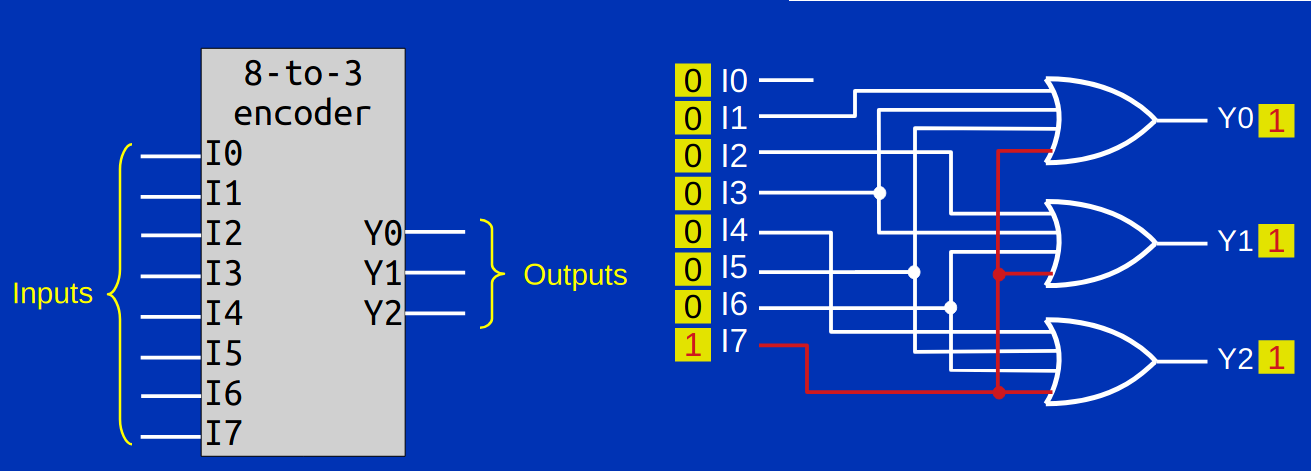

In this example, input I7 has been turned on, while the rest of the inputs I6 through I0 remain off. The 3-bit binary form of this number is 3'b111, and so the encoder outputs 1 on all of its outputs. **Take note that this encoder does not have a strobe, but you are asked to implement one for this step.**

Follow this pattern to build a basic encoder with sixteen inputs, four outputs, and a strobe output signal. When any single input is asserted, the strobe output should be asserted, with the outputs indicating the binary encoding of the input as explained in the example above. For example, if in[5] is pressed, the strobe signal should be asserted, and the value of out[3:0] should be 4'b0101.

A basic encoder has a deficiency that multiple input assertions will result in a composite output. For instance, if in[5] and in[9] were asserted at the same time, the out signal will be 4'b1101 (which is the bitwise 'OR' of 4'b0101 and 4'b1001). **We specifically want to see this behavior in your design, so you will not get any points if you submit a priority encoder, or other such device that ignores inputs in any way.** An effect of this deficiency is exhibited in the example of the 8-to-3 decoder below - observe that the inputs I5 and I2 are asserted, but the output shows 3'b111, or 7, which is obviously neither 5 nor 2.

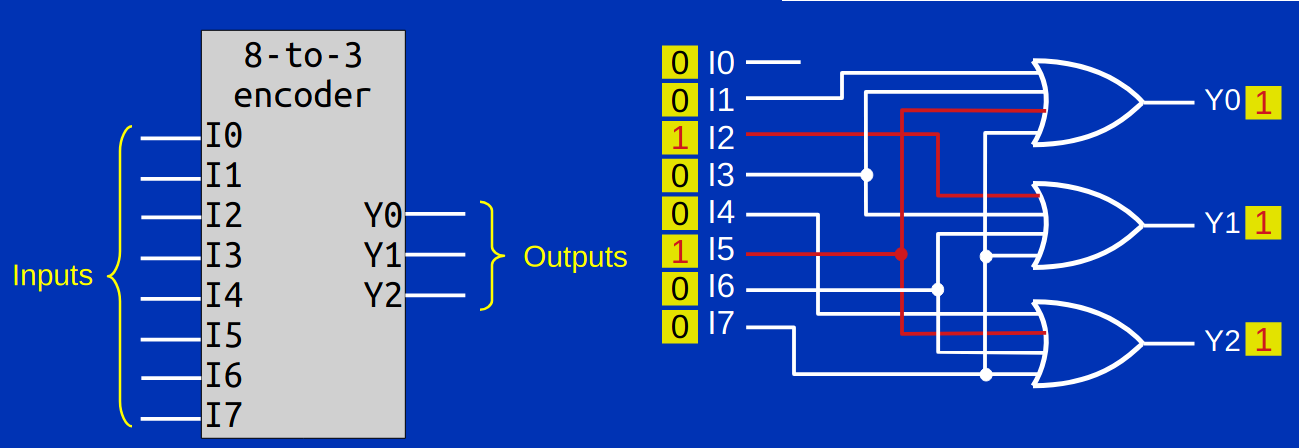

To implement this module, set it up so that:

*   out[3] is 1 when any of in[15:8] are asserted
*   out[2] is 1 when any of in[15:12] or in[7:4] are asserted
*   out[1] is 1 when any of in[15:14], in[11:10], in[7:6], in[3:2], are asserted
*   out[0] is 1 when any of the odd-numbered elements of **in** are asserted

To test your design, press any of the push buttons from 'F' – '0'. You should see the binary-encoded result on the four rightmost red LEDs. When any of those sixteen buttons are pressed, the green center LED should also light up. In a later exercise, you will have a more intuitive way of testing your encoder.

When you have tested your design well, submit the file (including modules **top** and **enc16to4**) below.

In [8]:
question2 = """

"""

3) Implement a 16-to-4 priority encoder in Verilog [10 points]
--------------------------------------------------------------

Create a SystemVerilog file in the "lab6" workspace of the simulator. Rename it "step3.sv". In the top module create a single instance:

    prienc16to4 u1(.in(pb[15:0]), .out(right[3:0]), .strobe(green));

Below the **top** module, create a new module named **prienc16to4** with the following ports (in any order you like):

*   **input logic [15:0] in**
*   **output logic [3:0] out**
*   **output logic strobe**

A priority encoder overcomes the deficiency with multiple input assertions that we saw in the previous step. For instance, if **in[5]** and **in[9]** were asserted at the same time, the **out** signal will be **4'b1001** since nine is greater than five.

You will build this priority encoder with sixteen inputs, four outputs, and a strobe output signal. When any single input is asserted, the strobe output should be asserted, and the binary encoding of the input. For instance, if **in[5]** is pressed, the strobe signal should be asserted, and the value of **out[3:0]** should be **4'b0101**.

To implement this module, we provide an 8-to-3 priority encoder below. Modify it to have a four-bit output. Be sure to use the port names and the module name listed above!


        /* 8-to-3 Priority Encoder */
        module pri_enc(
        input logic [7:0] I,  // 7 - 0: highest - lowest priority
        output logic [2:0] E, // Encoded output
        output logic G        // Strobe output (asserted when any input)
        );      

        assign {E,G} = I[7] == 1 ? 4'b1111 /* Input 7 is high */ :
                    I[6] == 1 ? 4'b1101 /* Input 6 is high */ :
                    I[5] == 1 ? 4'b1011 /* Input 5 is high */ :
                    I[4] == 1 ? 4'b1001 /* Input 4 is high */ :
                    I[3] == 1 ? 4'b0111 /* Input 3 is high */ :
                    I[2] == 1 ? 4'b0101 /* Input 2 is high */ :
                    I[1] == 1 ? 4'b0011 /* Input 1 is high */ :
                    I[0] == 1 ? 4'b0001 /* Input 0 is high */ :
                                4'b0000; // Nothing pressed.
        endmodule


The code intentionally has errors. Copy each line, fix each one if it has errors, and make sure you understand what you're writing.

To test your design, press any of the push buttons from 'F' – '0'. You should see the binary-encoded result on the four rightmost red LEDs. When any of those sixteen buttons are pressed, the green center LED should also light up. If you press two or more buttons simultaneously, the higher value button will determine the value output from the encoder. In a later exercise, you will have a more intuitive way of testing your encoder.

When you have tested your design well, submit the file (including modules top and prienc16to4) below.


In [9]:
Question_3 = """

"""

4) Implement and verify a 4-to-1 multiplexer with discrete logic [30 points]
----------------------------------------------------------------------------

Review the instructions in the lab document on how to build a 4-to-1 mux on your breadboard. Make sure you have two 74HC10 triple 3-input NAND gates and a 74HC04 hex inverter. You will need one LED (of any color you like) to represent the output and two push buttons to use as selector inputs. When you've tested your circuit, you will plug in the AD2 and use AutoLab to evaluate it.

Once you have verified your circuit using AutoLab, enter the completion code generated by AutoLab for the multiplexer you wired.

**Completion code:**

In [10]:
completion_code = ""

In [ ]:
import json

variables_list = [
    name, username,
    question_1, question2, Question_3,
    completion_code
]

variables_json = json.dumps({
    "name": name,
    "username": username,
    "question_1": question_1,
    "question2": question2,
    "Question_3": Question_3,
    "completion_code": completion_code
}, indent=4)

with open('prelab6_output.json', 'w') as f:
    f.write(variables_json)


SyntaxError: invalid syntax (1197792489.py, line 15)